<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_1704_feature_engineering_01_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Next Steps After Feature Engineering

Once you've created new features through feature engineering, the following steps are crucial:

### 1. **Evaluate the New Features:**
* **Correlation Analysis:** Check for multicollinearity among features.
* **Visualization:** Explore the distribution of new features.
* **Basic Statistical Analysis:** Calculate summary statistics (mean, median, standard deviation) for new features.

### 2. **Feature Selection:**
* **Identify Redundant Features:** Remove features that are highly correlated with others.
* **Select Informative Features:** Use techniques like correlation analysis, feature importance, or statistical tests to identify the most relevant features.

### 3. **Model Building:**
* **Include New Features:** Incorporate the selected features into your machine learning model.
* **Model Training and Evaluation:** Train your model on the dataset with the new features and evaluate its performance.

### 4. **Iterative Refinement:**
* **Feature Importance:** Analyze feature importance from the model to identify potential improvements.
* **Feature Engineering:** Create additional features based on insights from the model.
* **Model Retraining:** Re-train the model with the updated feature set.

### Additional Considerations:
* **Overfitting:** Be cautious about creating too many features, as it can lead to overfitting.
* **Computational Cost:** Consider the computational implications of adding new features.
* **Domain Knowledge:** Leverage domain expertise to guide feature selection and engineering.

**Remember:** Feature engineering is an iterative process. It's often necessary to experiment with different feature combinations and evaluate their impact on model performance.

**Would you like to delve deeper into a specific step or discuss a particular challenge you're facing?**


Your plan for the next steps after feature engineering is comprehensive and well-structured. It covers the essential aspects of evaluating and selecting features. Here are a few additional suggestions that could enhance your analysis:

### Additional Steps to Consider:

1. **Handling Multicollinearity**:
   - **Variance Inflation Factor (VIF)**: In addition to correlation analysis, you can calculate the Variance Inflation Factor (VIF) for each feature to quantify how much multicollinearity exists. Features with a high VIF (typically > 5 or 10) might be candidates for removal.

2. **Dimensionality Reduction**:
   - **PCA (Principal Component Analysis)**: After identifying redundant features, you might consider applying PCA to reduce dimensionality while retaining as much variance as possible. This step can be particularly useful if you have a large number of correlated features.

3. **Model-Based Feature Importance**:
   - **Feature Importance from Models**: Use models like Random Forest, Gradient Boosting, or even a simple logistic regression to calculate feature importance scores. This method can complement your statistical analysis and help identify the most predictive features.

4. **Interaction Effects**:
   - **Evaluate Interaction Features**: Since you created interaction features, it might be useful to assess their impact separately. Consider fitting models both with and without interaction terms to see how they influence model performance.

5. **Cross-Validation for Feature Selection**:
   - **Cross-Validation**: When selecting features, use cross-validation to ensure that the selected features generalize well to unseen data. This step can prevent overfitting to the training data.

6. **Feature Scaling Revisit**:
   - **Check Scaling Consistency**: After feature engineering, ensure that the new features are properly scaled if necessary, especially before using models sensitive to feature scaling (e.g., logistic regression, SVMs).

7. **Handling Outliers**:
   - **Outlier Analysis**: Revisit outlier analysis for your new features. If your new features are highly sensitive to outliers, consider applying robust scaling or removing extreme outliers.

### Summary:
Your plan is solid, and these additional steps are optional enhancements that could further refine your feature evaluation and selection process. They offer more robust handling of multicollinearity, dimensionality reduction, and model-based insights into feature importance. If these align with your goals, you can incorporate them into your workflow.



### 1. **Initial Feature Analysis and Exploration**
   - **Basic Statistical Summary:** Calculate summary statistics (mean, median, standard deviation, etc.) for each feature.
   - **Distribution Visualization:** Plot histograms or boxplots to visualize the distribution of each feature. This helps identify skewness, outliers, and other characteristics.
   - **Correlation Analysis:**
     - **Heatmap and Pairplot:** Use a heatmap to visualize correlations between features. A pairplot can provide more detailed pairwise relationships.
     - **Multicollinearity Check:** Identify features with high correlation (>0.8) to avoid redundancy.

### 2. **Feature Importance Evaluation**
   - **Model-Based Feature Importance:**
     - **Tree-Based Models:** Train models like RandomForest or Gradient Boosting to get feature importance scores.
     - **SHAP Values:** Use SHAP (SHapley Additive exPlanations) to interpret feature importance and understand how each feature contributes to the predictions.
   - **Statistical Methods:**
     - **Univariate Tests:** Use tests like chi-square (for categorical features) or ANOVA (for numerical features) to rank features based on relevance.
   - **Recursive Feature Elimination (RFE):** Use RFE with a simple model (e.g., logistic regression) to recursively remove the least important features until optimal performance is achieved.

### 3. **Feature Selection Strategy**
   - **Remove Highly Correlated Features:** Based on correlation analysis, remove one feature from each highly correlated pair (if the correlation is >0.8).
   - **Rank Features by Importance:** Use feature importance scores or SHAP values to rank and retain only the most impactful features.
   - **Cross-Validation and Performance Check:** Perform cross-validation to ensure that selected features improve model performance. Compare metrics like accuracy, F1 score, and AUC before and after feature selection.
   - **Regularization Techniques:** Use techniques like Lasso (L1 regularization) to automatically select features by driving less important feature coefficients to zero.

### 4. **Iterative Feature Selection and Refinement**
   - **Feature Interaction Analysis:** Analyze interaction terms that may be valuable (e.g., combinations of certain features that influence the outcome).
   - **Stepwise Feature Selection:** Implement a stepwise selection method (forward or backward) to iteratively add or remove features based on their impact on a chosen performance metric.

### 5. **Final Evaluation and Model Tuning**
   - **Refine the Feature Set:** Continuously refine the feature set, monitoring performance on validation data.
   - **Model Tuning:** Once the most valuable features are identified, proceed with hyperparameter tuning to maximize performance.

### Additional Suggestions
- **Feature Scaling:** Ensure that the features are scaled (especially for models like logistic regression or SVM).
- **Cross-Feature Interactions:** Consider generating polynomial features or interactions for a subset of selected features.
- **Visualization of Feature Contributions:** Use SHAP summary plots or partial dependence plots to better understand feature contributions.

### Next Steps
1. Start with correlation analysis and visualization to get an overview of your new features.
2. Move on to model-based feature importance and recursive elimination techniques.
3. Perform a detailed comparison of model performance before and after feature selection.

This plan should give you a structured approach to evaluate and refine your feature set. We can now dive into coding each step if you're ready!

## Load & Preprocess Baseline Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import cross_val_score
import json
import warnings
from loan_data_utils import load_and_preprocess_data, plot_classification_report_metrics, ThresholdClassifier

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage', 'education']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = ['sex', 'marriage']
# Define the custom ordering for the 'education' variable as ordered category
education_order = [0, 1, 2, 3, 4, 5, 6]

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('education_ord', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal_encoder', OrdinalEncoder(categories=[education_order]))
        ]), ['education']),  # Treat education separately with ordinal encoding
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_columns)
    ])

# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE after preprocessing
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

# Use the custom classifier with Logistic Regression and a threshold of 0.3 for class 1
base_classifier = LogisticRegression(max_iter=5000)
classifier = ThresholdClassifier(base_classifier, threshold=0.3)

# Train the classifier on the resampled data
classifier.fit(X_train_res, y_train_res)

# Predict and evaluate on the preprocessed test set
y_pred = classifier.predict(X_test_preprocessed)
baseline_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Initialize a dictionary to store the classification reports
experiment_results = {}

# Add the baseline report to the dictionary
experiment_results['baseline'] = baseline_report

# Define the path and filename for the JSON file
json_filename = 'classification_reports_feature_engineering.json'

# Function to save the experiment results to a JSON file
def save_experiment_results(results, filename):
    with open(filename, 'w') as json_file:
        json.dump(results, json_file, indent=4)
    print(f'Experiment results saved to {filename}')

# Save the baseline report to the JSON file
save_experiment_results(experiment_results, json_filename)

              precision    recall  f1-score   support

           0       0.88      0.24      0.38      4673
           1       0.25      0.88      0.39      1327

    accuracy                           0.38      6000
   macro avg       0.56      0.56      0.38      6000
weighted avg       0.74      0.38      0.38      6000

Experiment results saved to classification_reports_feature_engineering.json


## Feature Engineering

In [2]:
from loan_data_feature_engineering import RatioFeatures, BinningFeatures, SelectiveBinningFeaturesOneHot, CustomInteractionFeatures

# Convert the preprocessed training data back to DataFrame

# Get the feature names from the preprocessor
numeric_feature_names = numeric_features
ordinal_feature_names = ['education']  # Since it's now processed as an ordinal category
onehot_feature_names = list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_columns))

# Combine the feature names
all_feature_names = numeric_feature_names + ordinal_feature_names + onehot_feature_names

# Convert the preprocessed data to DataFrames with the correct feature names
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

# Define your custom interaction pairs
interaction_pairs = [
    ('limit_bal', 'age'),
    ('limit_bal', 'pay_1'),
    ('limit_bal', 'pay_2'),
    ('bill_amt1', 'pay_amt1'),
    ('marriage_1', 'pay_1'),
    ('education_5', 'pay_1'),
    ('sex_2', 'pay_1'),
    ('marriage_1', 'pay_2'),
    ('sex_2', 'marriage_2'),
]

# Step 1: Apply Interaction Features First
interaction_pipeline = Pipeline(steps=[
    ('interaction', CustomInteractionFeatures(interaction_pairs=interaction_pairs))
])

# Step 2: Then Apply Feature Engineering Pipeline
features_to_bin = ['bill_amt1', 'pay_amt1', 'limit_bal']

feature_engineering_pipeline = Pipeline(steps=[
    ('ratio', RatioFeatures()),
    ('binning', SelectiveBinningFeaturesOneHot(features_to_bin, n_bins=5, encode='onehot', strategy='quantile'))
])

# Combine Interaction Pipeline with the Feature Engineering Pipeline
full_pipeline = Pipeline(steps=[
    ('interaction', interaction_pipeline),
    ('feature_engineering', feature_engineering_pipeline)
])

# Apply the full pipeline to the training data
X_train_fe = full_pipeline.fit_transform(X_train_preprocessed_df)
X_test_fe = full_pipeline.transform(X_test_preprocessed_df)

# Apply SMOTE after feature engineering
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_fe, y_train)

# Now you can proceed with model training
classifier = LogisticRegression(max_iter=5000, solver='saga', C=0.1)
classifier.fit(X_train_res, y_train_res)

# Evaluate on the test set
y_pred_fe = classifier.predict(X_test_fe)
fe_report = classification_report(y_test, y_pred_fe, output_dict=True)
print(classification_report(y_test, y_pred_fe))

# Add the current experiment report to the dictionary
experiment_results['feature_engineering'] = fe_report

# Save the updated experiment results to the JSON file
save_experiment_results(experiment_results, json_filename)


              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4673
           1       0.44      0.62      0.51      1327

    accuracy                           0.74      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.74      0.75      6000

Experiment results saved to classification_reports_feature_engineering.json


### Correlation Analysis

When analyzing correlations in your feature set, especially after feature engineering, there are a few key objectives you should focus on:

### 1. **Identify Features Highly Correlated with the Target Variable**:
   - **Goal**: Keep features that are highly correlated with the target variable (`y`). These features are likely to be important predictors and can improve the performance of your model.
   - **How**: Look at the correlation values between each feature and the target variable. Features with a high positive or negative correlation with the target are typically useful.

### 2. **Identify and Handle Multicollinearity**:
   - **Goal**: Detect and potentially remove features that are highly correlated with each other. High correlation between features (multicollinearity) can lead to issues in models like linear regression, where the model might struggle to distinguish between the effects of the correlated features.
   - **How**:
     - If two features are highly correlated (e.g., correlation > 0.8 or < -0.8), consider removing one of them.
     - You can either drop one of the correlated features or combine them in a way that captures their combined effect (e.g., through PCA or by creating an interaction feature).

### 3. **Use Domain Knowledge**:
   - **Goal**: Apply your understanding of the data and the problem domain to make informed decisions about which features to keep or remove.
   - **How**:
     - Even if two features are highly correlated, you might choose to keep both if they provide important, distinct information from a domain perspective.
     - Conversely, if a feature is highly correlated with another but doesn't add much interpretative value, you might choose to remove it.

### 4. **Prioritize Features Based on Correlation with the Target**:
   - **Feature Importance**: Features with a strong correlation to the target variable are often more important. You can use these features to build your initial models and refine them by testing additional features.
   - **Balance with Multicollinearity**: While strong correlation with the target is good, make sure these features are not too correlated with each other, as this can dilute the predictive power.

### Practical Steps:

- **High Correlation with Target**: Keep.
- **High Correlation with Other Features**: Consider removing one of the features to avoid multicollinearity, unless there's a strong reason to keep both (e.g., domain knowledge).
- **Use Visualizations**: Heatmaps and scatter plots can help visualize these relationships, making it easier to decide which features to keep or combine.

### Example Workflow:

1. **Filter for High Correlation with Target**:
   - Identify and prioritize features that are highly correlated with the target.

2. **Check for Multicollinearity**:
   - Identify pairs of features that are highly correlated with each other. Decide which ones to keep based on their correlation with the target and domain relevance.

3. **Iterate and Test**:
   - Iterate over your feature set, testing different combinations to find the best performing model while keeping multicollinearity in check.

By following these guidelines, you can make informed decisions about which features to include in your model, balancing the need for predictive power with the need to avoid multicollinearity.

Great, your setup looks well-organized! Let's outline the next steps for analyzing and selecting the most valuable features.

### Next Steps for Feature Analysis and Selection

1. **Correlation Analysis**:
    - Visualize the correlations between the newly engineered features and identify any features that are highly correlated. You can use a heatmap to check for correlations above a certain threshold (e.g., 0.8).
    - Drop one of the features from highly correlated pairs to reduce redundancy.

2. **Feature Importance using Model-Based Methods**:
    - Use models like RandomForest or GradientBoosting to rank features based on their importance. You can extract the feature importance scores and visualize them using a bar chart.

3. **Recursive Feature Elimination (RFE)**:
    - Apply RFE with your logistic regression model to recursively select the most important features. You can check performance at each step and select the optimal number of features.

4. **Statistical Tests for Feature Relevance**:
    - For categorical features, use chi-square tests to check for relevance.
    - For numerical features, use ANOVA or mutual information tests to rank features based on their predictive power.

5. **Evaluating Interaction Terms**:
    - Analyze the interaction terms separately to see which combinations are genuinely impactful. Sometimes, these can show high correlations, so consider reviewing their significance independently.

6. **Model Performance Check**:
    - After filtering or selecting features, compare the model performance (e.g., accuracy, F1 score, AUC) using cross-validation before and after feature selection. This will help verify if the selected features are improving the model.

7. **Iterative Refinement**:
    - Based on the results from the above methods, iteratively refine your feature set. Drop features that consistently show low importance or introduce noise.

8. **Saving the Final Feature Set**:
    - Once you have identified the most valuable features, save the selected feature names in a list or JSON file for consistency and future reference.

---

Let's start by implementing correlation analysis to see if any of your features are redundant. Do you want me to draft the code for this step first?

## Correlation Analysis - Engineered Features

### Handling One-Hot Encoded Features in Correlation Analysis
1. **Dropping the Original Categorical Features**:
    - Since the original categorical variables (like ‘sex’, ‘education’, ‘marriage’) are represented by their one-hot encoded versions, it’s best to drop the original categorical features for correlation analysis. The one-hot encoded columns provide more granular information.

2. **Handling Redundant One-Hot Encoded Features**:
    - For one-hot encoded features (e.g., `education_1`, `education_2`, ...), correlation analysis can be tricky. Since these columns are binary (0 or 1), they often show perfect or near-perfect correlation, especially when there are few categories. This can lead to misleading results.
    - To address this:
        - You can keep only one column from each set of one-hot encoded features (e.g., keep `education_1` and drop the others) to avoid redundancy. This approach assumes the dropped categories are sufficiently represented by the remaining columns.

3. **Prioritizing Engineered Features**:
    - Focus on the engineered features (like `bill_amt1_binned`, `limit_bal_age`, etc.) since they might offer more nuanced information than the original features.
    - Include the engineered features alongside key original numeric features (like `age`, `limit_bal`) to see how they correlate and decide if certain original features can be dropped in favor of engineered ones.

4. **Correlation Threshold**:
    - After calculating the correlation matrix, set a threshold (e.g., 0.8) to flag highly correlated features. For each highly correlated pair, consider dropping one based on domain knowledge or model importance.

### Steps Moving Forward:
1. **Drop Original Categorical Columns and Handle Redundant One-Hot Encoded Columns**.
2. **Create and Visualize a Correlation Matrix for the Selected Features**.
3. **Analyze Correlation Among Engineered Features and Decide Which to Keep or Remove**.

Would you like to proceed with implementing this approach now?

In [3]:
print('Base Features', X_train.columns)
print('\nBase Features + Engineered', X_train_fe.columns)

Base Features Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')

Base Features + Engineered Index(['bill_amt1_bin_0', 'bill_amt1_bin_1', 'bill_amt1_bin_2',
       'bill_amt1_bin_3', 'bill_amt1_bin_4', 'pay_amt1_bin_0',
       'pay_amt1_bin_1', 'pay_amt1_bin_2', 'pay_amt1_bin_3', 'pay_amt1_bin_4',
       'limit_bal_bin_0', 'limit_bal_bin_1', 'limit_bal_bin_2',
       'limit_bal_bin_3', 'limit_bal_bin_4', 'age', 'pay_1', 'pay_2', 'pay_3',
       'pay_4', 'pay_5', 'pay_6', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt2', 'pay_amt3', 'pay_amt4',
       'pay_amt5', 'pay_amt6', 'education', 'sex_2', 'marriage_1',
       'marriage_2', 'marriage_3', 'limit_bal_age', 'limit_bal_pay_1',
       'limit_bal_pay_

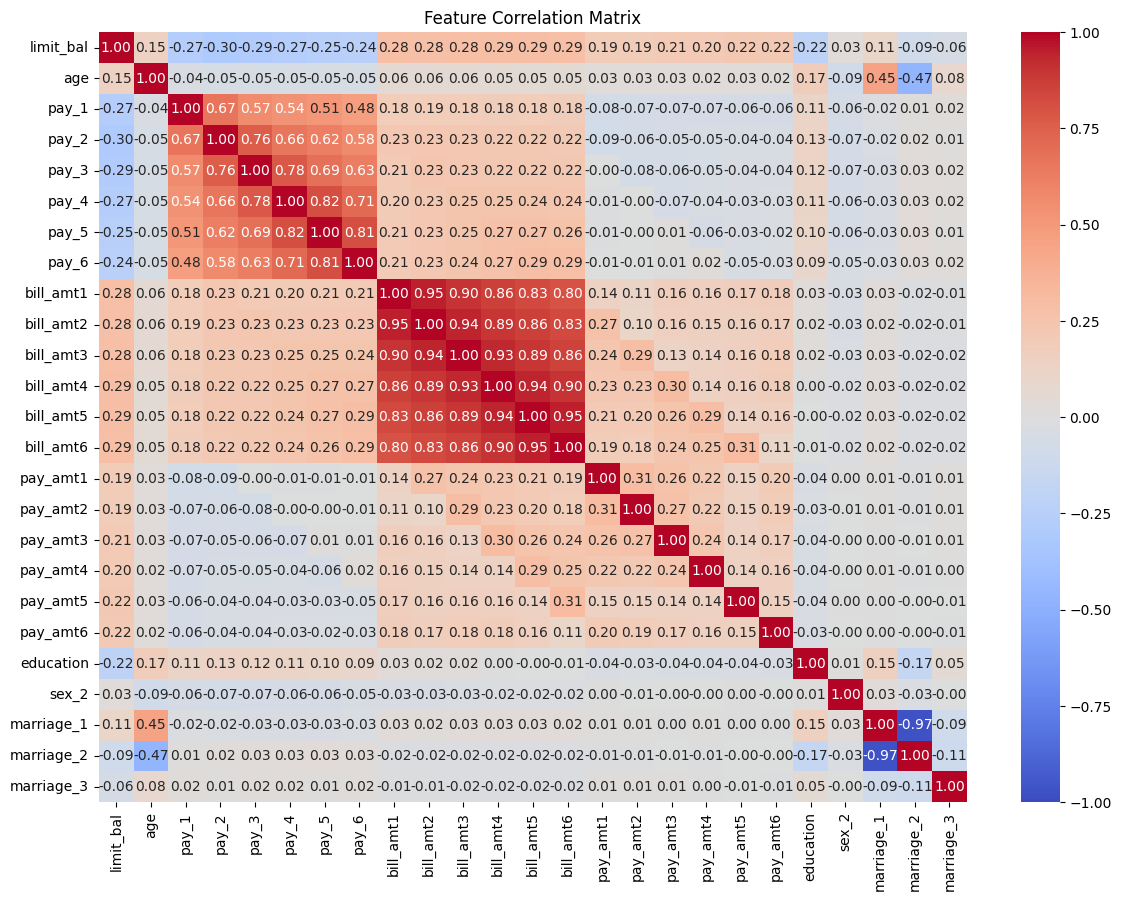

Dropped Features due to High Correlation: {'bill_amt3', 'marriage_2', 'bill_amt6', 'bill_amt4', 'pay_5', 'bill_amt2', 'bill_amt5'}


In [11]:
# Step 1: Drop only the original categorical columns that are not ordinal
categorical_columns_to_drop = ['sex', 'marriage']  # 'education' is now ordinal, so we keep it
X_train_corr = X_train_preprocessed_df.drop(columns=categorical_columns_to_drop, errors='ignore')
X_test_corr = X_test_preprocessed_df.drop(columns=categorical_columns_to_drop, errors='ignore')

# Step 2: Calculate the correlation matrix
corr_matrix = X_train_corr.corr()

# Step 3: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

# Step 4: Identify highly correlated pairs and drop one of each pair
threshold = 0.8
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

# List of features to drop (keeping only one feature from each highly correlated pair)
features_to_drop = set()
for col1, col2 in high_corr_pairs:
    if col1 not in features_to_drop and col2 not in features_to_drop:
        features_to_drop.add(col2)  # Drop the second feature in each pair

# Drop the identified features from both training and test sets
X_train_reduced = X_train_corr.drop(columns=features_to_drop)
X_test_reduced = X_test_corr.drop(columns=features_to_drop)

print(f"Dropped Features due to High Correlation: {features_to_drop}")

## Correlation Model Report

In [10]:
# Drop the identified features from both training and test sets
X_train_corr_reduced = X_train_corr.drop(columns=features_to_drop)
X_test_corr_reduced = X_test_corr.drop(columns=features_to_drop)

# Apply SMOTE after dropping the correlated features
smote = SMOTE(random_state=42)
X_train_res_corr, y_train_res_corr = smote.fit_resample(X_train_corr_reduced, y_train)

# Train the model on the reduced feature set
classifier = LogisticRegression(max_iter=5000, solver='saga', C=0.1)
classifier.fit(X_train_res_corr, y_train_res_corr)

# Evaluate on the test set
y_pred_corr = classifier.predict(X_test_corr_reduced)
corr_report = classification_report(y_test, y_pred_corr, output_dict=True)
print(classification_report(y_test, y_pred_corr))

# Add the correlation-based experiment report to the dictionary
experiment_results['correlation_model'] = corr_report

# Save the updated experiment results to the JSON file
save_experiment_results(experiment_results, json_filename)


Dropped Features due to High Correlation: {'bill_amt3', 'marriage_2', 'bill_amt6', 'bill_amt4', 'pay_5', 'bill_amt2', 'bill_amt5'}


## Correlation Model Analysis

### **Feature Selection Summary**

#### 1. **Original Numerical Features**:
   - We included relevant numerical features like `limit_bal`, `age`, and `pay_amt1`, among others. These features represent key financial and demographic information directly relevant to predicting default risk.

#### 2. **Ordinally Encoded Categorical Feature: `education`**:
   - The "education" feature was treated as an ordinal category, reflecting the natural progression from primary to advanced education levels. This encoding ensures that the ordinal relationship is preserved in the model while avoiding redundant one-hot encoded features.

#### 3. **One-Hot Encoded Categorical Features: `sex` and `marriage`**:
   - The "sex" and "marriage" features were one-hot encoded to capture nominal categories without introducing a false ordinal relationship. This approach ensures that the model can differentiate between categories without assuming any order.

#### 4. **Engineered Features**:
   - Features like binned versions of `bill_amt1`, `pay_amt1`, and `limit_bal` were included to capture non-linear relationships. We used one-hot encoding for these binned features since they don’t have a meaningful ordinal relationship.

#### 5. **Dropped Features After Correlation Analysis**:
   - The following features were dropped due to high correlation (above 0.8) with other features:
     - `bill_amt3`
     - `bill_amt6`
     - `bill_amt4`
     - `pay_5`
     - `bill_amt2`
     - `bill_amt5`
     - `marriage_2`
   - These features were highly correlated with other selected features and were therefore considered redundant, leading to their exclusion to avoid multicollinearity and reduce noise in the model.

### **Rationale for Selection**:
- The selected features strike a balance between preserving key information and reducing redundancy. The encoding strategies (ordinal for "education", one-hot for "sex" and "marriage") ensure that categorical relationships are appropriately captured while minimizing dimensionality.
- The correlation analysis identified and removed features that could introduce multicollinearity, enhancing model performance by focusing on the most informative variables.

### **Conclusion**:
The final feature set provides a clean, relevant input for model training, optimized for both interpretability and predictive power.

---

This summary should be helpful for documenting your feature selection process and justifying your decisions. If there’s anything more you’d like to include, feel free to ask!

In [13]:
# Keep all relevant encoded features, including one-hot encoded and ordinal features
X_train_corr_reduced = X_train_preprocessed_df.drop(columns=features_to_drop)
X_test_corr_reduced = X_test_preprocessed_df.drop(columns=features_to_drop)

# Apply SMOTE after dropping the correlated features
smote = SMOTE(random_state=42)
X_train_res_corr, y_train_res_corr = smote.fit_resample(X_train_corr_reduced, y_train)

# Train the model on the reduced feature set
classifier = LogisticRegression(max_iter=5000, solver='saga', C=0.1)
classifier.fit(X_train_res_corr, y_train_res_corr)

# Evaluate on the test set
y_pred_corr = classifier.predict(X_test_corr_reduced)
corr_report = classification_report(y_test, y_pred_corr, output_dict=True)
print(classification_report(y_test, y_pred_corr))

# Add the correlation-based experiment report to the dictionary
experiment_results['correlation_model'] = corr_report

# Save the updated experiment results to the JSON file
save_experiment_results(experiment_results, json_filename)


              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4673
           1       0.36      0.62      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.75      0.67      0.70      6000

Experiment results saved to classification_reports_feature_engineering.json


## Feature Importance - Logistic Regression
Logistic regression coefficients can be interpreted as feature importance. The magnitude of the coefficients indicates the strength of the relationship between a feature and the target.

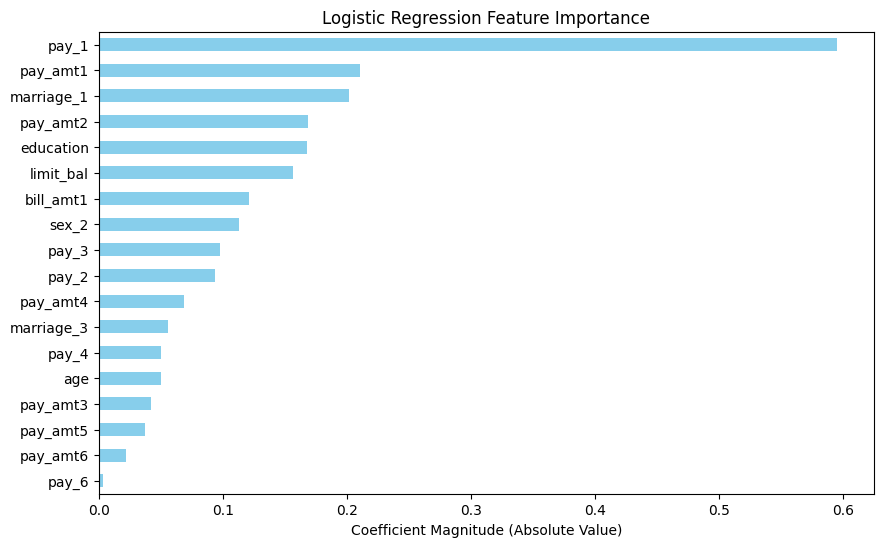

In [15]:
# Train the logistic regression model (assuming the correlation model setup)
classifier = LogisticRegression(max_iter=5000, solver='saga', C=0.1)
classifier.fit(X_train_res_corr, y_train_res_corr)

# Extract feature importance (coefficients)
feature_importance_lr = pd.Series(classifier.coef_[0], index=X_train_corr_reduced.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance_lr.abs().sort_values().plot(kind='barh', color='skyblue')
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Coefficient Magnitude (Absolute Value)")
plt.show()


## Feature Importance - Random Forest

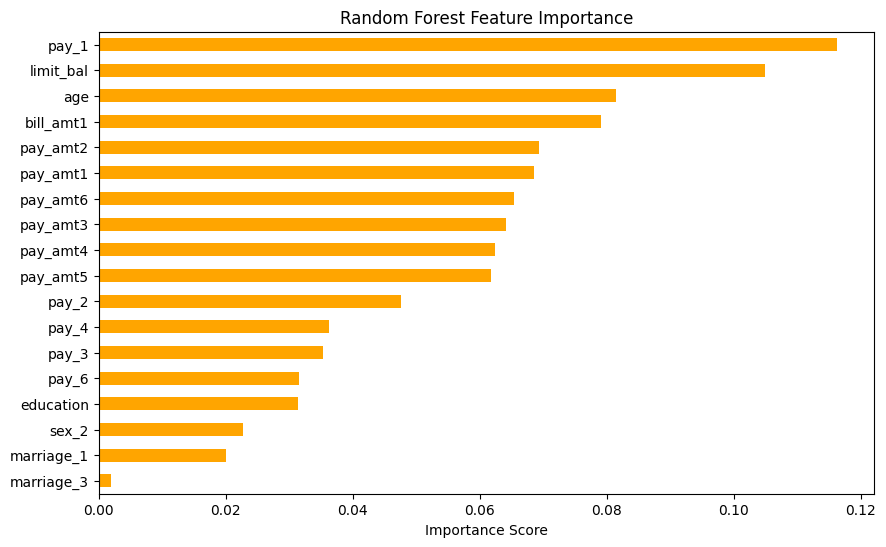

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_res_corr, y_train_res_corr)

# Extract feature importance
feature_importance_rf = pd.Series(rf_classifier.feature_importances_, index=X_train_corr_reduced.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance_rf.sort_values().plot(kind='barh', color='orange')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()


## Feature Importance - Gradient Boost

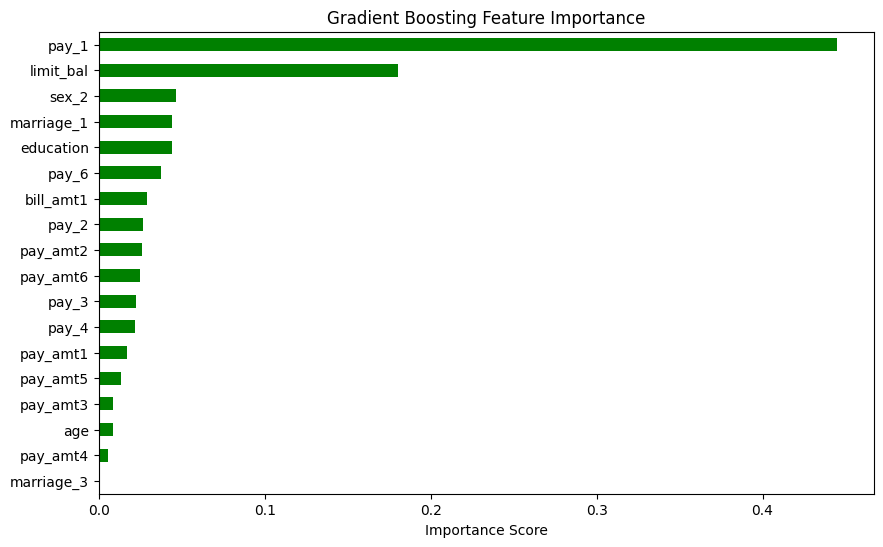

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_res_corr, y_train_res_corr)

# Extract feature importance
feature_importance_gb = pd.Series(gb_classifier.feature_importances_, index=X_train_corr_reduced.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance_gb.sort_values().plot(kind='barh', color='green')
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.show()


## Feature Importance - Model Training & Analysis

In [20]:
def get_top_n_features(feature_importances, n):
    return feature_importances.abs().sort_values(ascending=False).head(n).index.tolist()

# Get the top N features from each method
n = 7  # You can adjust N as needed
top_features_lr = get_top_n_features(feature_importance_lr, n)
top_features_rf = get_top_n_features(feature_importance_rf, n)
top_features_gb = get_top_n_features(feature_importance_gb, n)

# Train and evaluate models with the top N features
for model_name, top_features in zip(
    ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    [top_features_lr, top_features_rf, top_features_gb]
):
    # Select the reduced feature set
    X_train_top = X_train_corr_reduced[top_features]
    X_test_top = X_test_corr_reduced[top_features]

    # Apply SMOTE
    X_train_res_top, y_train_res_top = smote.fit_resample(X_train_top, y_train)

    # Train the model
    if model_name == "Logistic Regression":
        classifier = LogisticRegression(max_iter=5000, solver='saga', C=0.1)
    elif model_name == "Random Forest":
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_name == "Gradient Boosting":
        classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

    classifier.fit(X_train_res_top, y_train_res_top)

    # Evaluate the model
    y_pred_top = classifier.predict(X_test_top)
    report = classification_report(y_test, y_pred_top, output_dict=True)
    print(f"\nClassification Report for {model_name} with Top {n} Features:")
    print(classification_report(y_test, y_pred_top))

    # Save the report
    experiment_results[f"{model_name}_top_{n}_features"] = report

# Save the updated experiment results to the JSON file
save_experiment_results(experiment_results, json_filename)



Classification Report for Logistic Regression with Top 7 Features:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      4673
           1       0.36      0.62      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.65      0.61      6000
weighted avg       0.75      0.67      0.70      6000


Classification Report for Random Forest with Top 7 Features:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4673
           1       0.48      0.46      0.47      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.66      0.66      6000
weighted avg       0.77      0.77      0.77      6000


Classification Report for Gradient Boosting with Top 7 Features:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4673
           1       0.50      0.52      0.

## Plot Performance Metrics

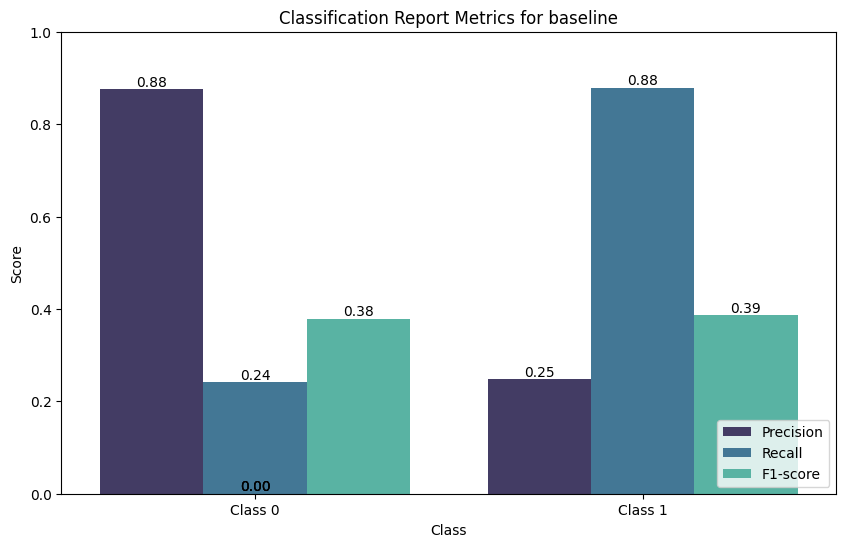

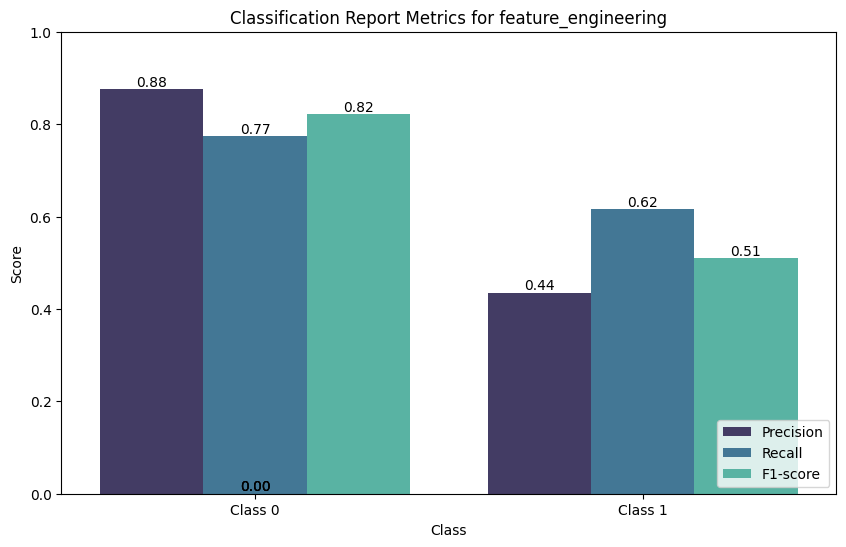

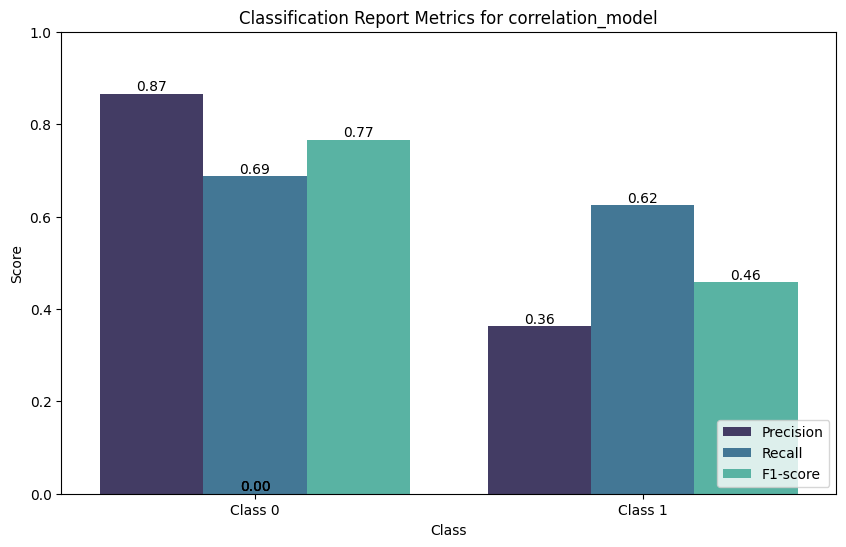

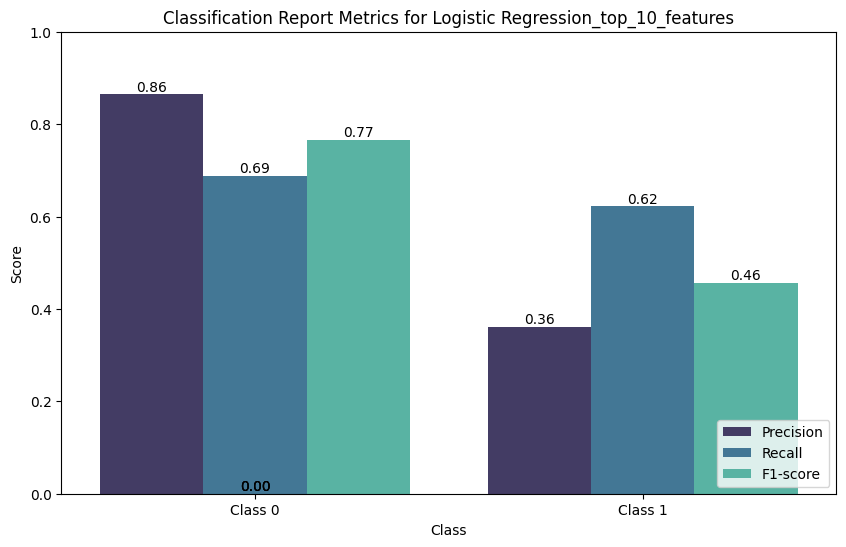

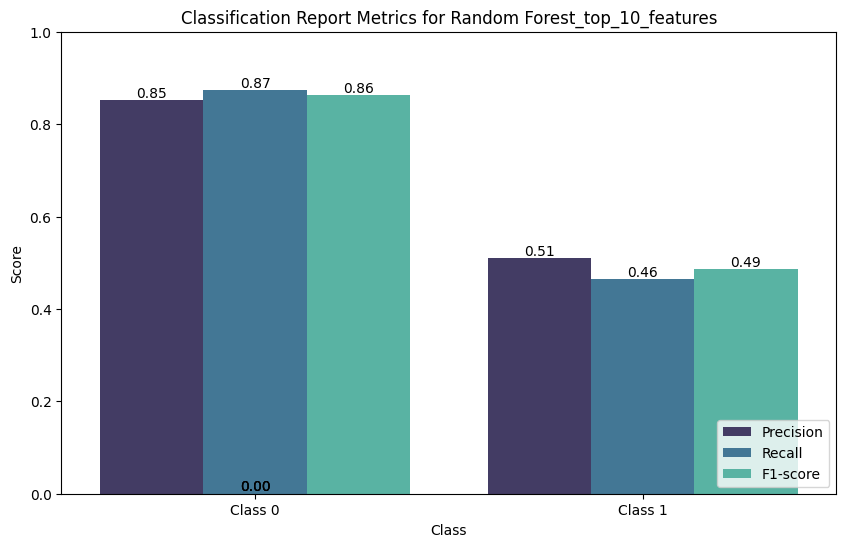

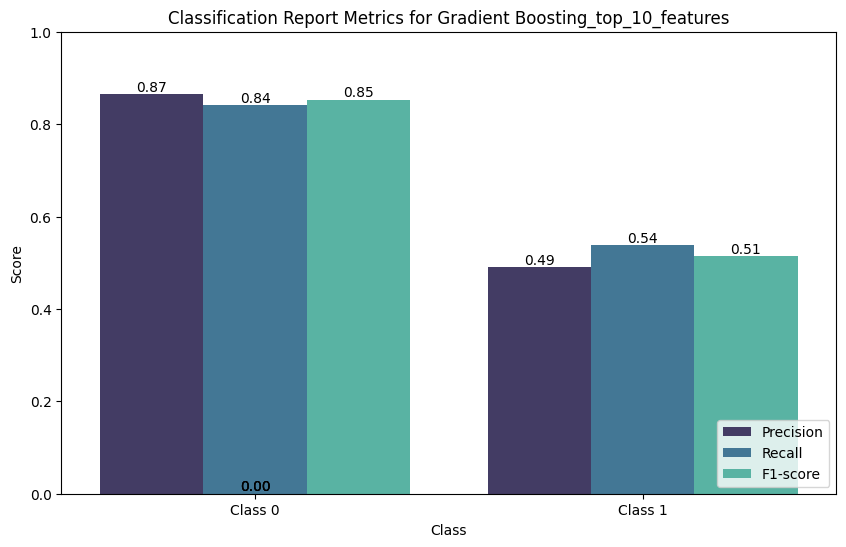

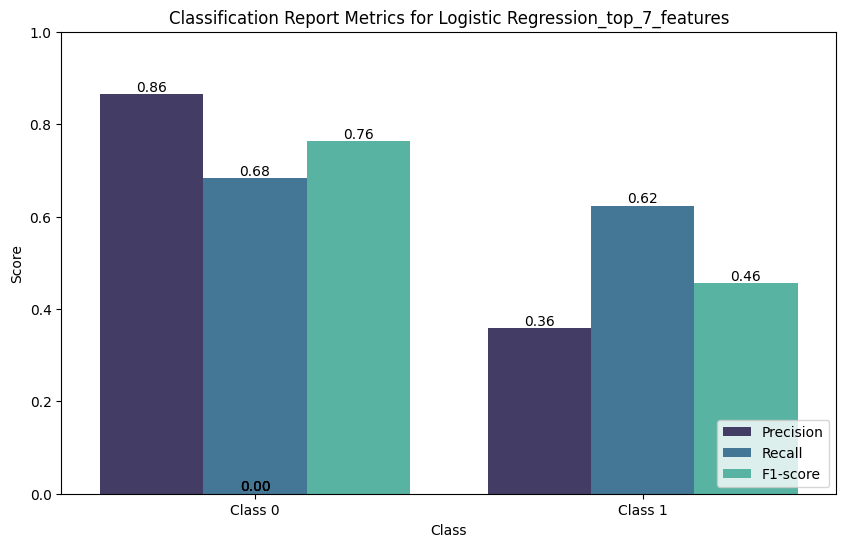

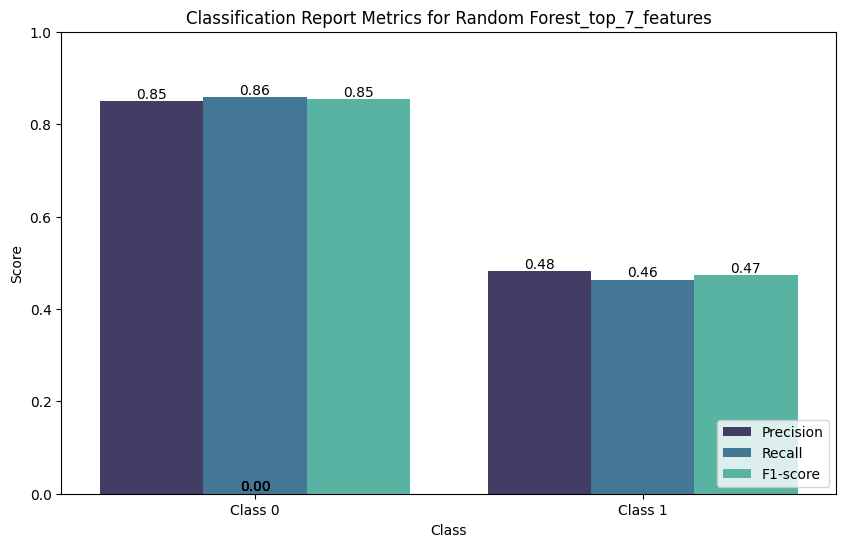

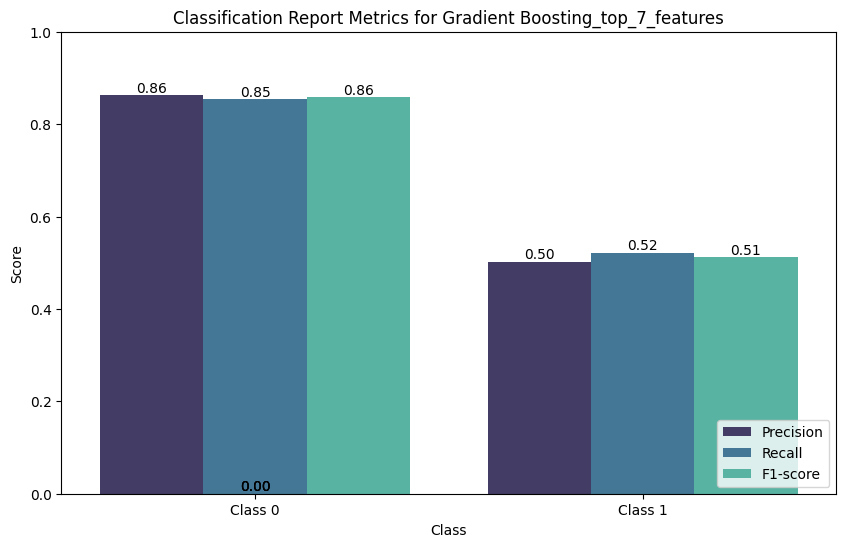

In [22]:
from loan_data_utils import plot_classification_report_metrics

# Loop through all saved classification reports and plot the metrics
for model_name, report in experiment_results.items():
    plot_classification_report_metrics(report, model_name)


#### Feature Engineering Script


In [8]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ------ Ratio Features ------ #

class RatioFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['bill_ratio'] = X['bill_amt1'] / X['limit_bal']
        X['pay_ratio'] = X['pay_amt1'] / X['limit_bal']
        X['age_income_ratio'] = X['age'] / X['limit_bal']
        return X

# ----- Binning Features ------ #

class BinningFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins=5, encode='ordinal', strategy='quantile'):
        # Explicitly store the parameters as class attributes
        self.n_bins = n_bins
        self.encode = encode
        self.strategy = strategy
        self.binner = KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy)

    def fit(self, X, y=None):
        self.binner.fit(X)
        self.feature_names_in_ = X.columns if isinstance(X, pd.DataFrame) else [f'feature_{i}' for i in range(X.shape[1])]
        return self

    def transform(self, X):
        X_binned = self.binner.transform(X)
        return pd.DataFrame(X_binned, columns=[f'{col}_binned' for col in self.feature_names_in_])


class SelectiveBinningFeaturesOrdinal(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_bin, n_bins=5, encode='ordinal', strategy='quantile'):
        self.features_to_bin = features_to_bin
        self.binner = KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy)
        self.other_features = None

    def fit(self, X, y=None):
        # Fit only the features that need binning
        self.binner.fit(X[self.features_to_bin])
        self.other_features = X.drop(columns=self.features_to_bin).columns.tolist()
        return self

    def transform(self, X):
        X_binned = self.binner.transform(X[self.features_to_bin])
        X_binned_df = pd.DataFrame(X_binned, columns=[f'{col}_binned' for col in self.features_to_bin])
        return pd.concat([X_binned_df, X[self.other_features].reset_index(drop=True)], axis=1)


class SelectiveBinningFeaturesOneHot(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_bin, n_bins=5, encode='onehot', strategy='quantile'):
        self.features_to_bin = features_to_bin
        self.binner = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
        self.onehot_encoder = OneHotEncoder(sparse_output=False)
        self.other_features = None
        self.encode = encode

    def fit(self, X, y=None):
        # Fit only the features that need binning
        self.binner.fit(X[self.features_to_bin])
        X_binned = self.binner.transform(X[self.features_to_bin])

        # Fit the one-hot encoder if needed
        if self.encode == 'onehot':
            self.onehot_encoder.fit(X_binned)

        self.other_features = X.drop(columns=self.features_to_bin).columns.tolist()
        return self

    def transform(self, X):
        X_binned = self.binner.transform(X[self.features_to_bin])

        # Apply one-hot encoding if needed
        if self.encode == 'onehot':
            X_binned = self.onehot_encoder.transform(X_binned)
            bin_columns = [f'{col}_bin_{i}' for col in self.features_to_bin for i in range(X_binned.shape[1] // len(self.features_to_bin))]
        else:
            bin_columns = [f'{col}_binned' for col in self.features_to_bin]

        X_binned_df = pd.DataFrame(X_binned, columns=bin_columns)
        return pd.concat([X_binned_df, X[self.other_features].reset_index(drop=True)], axis=1)


# ----- Interaction Features ------ #

class TargetedInteractionFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, interaction_pairs=None, degree=2, interaction_only=True, include_bias=False):
        self.degree = degree
        self.interaction_only = interaction_only
        self.include_bias = include_bias
        self.poly = PolynomialFeatures(degree=self.degree, interaction_only=self.interaction_only, include_bias=self.include_bias)
        self.feature_names_in_ = None
        self.interaction_pairs = interaction_pairs  # List of tuples specifying which pairs to interact

    def fit(self, X, y=None):
        if self.interaction_pairs is None:
            self.poly.fit(X)
            self.feature_names_in_ = X.columns if isinstance(X, pd.DataFrame) else [f'feature_{i}' for i in range(X.shape[1])]
        else:
            # Limit the features to the interaction pairs
            interaction_columns = [pair[0] for pair in self.interaction_pairs] + [pair[1] for pair in self.interaction_pairs]
            X_selected = X[interaction_columns]
            self.poly.fit(X_selected)
            self.feature_names_in_ = X_selected.columns
        return self

    def transform(self, X):
        if self.interaction_pairs is None:
            X_poly = self.poly.transform(X)
            return pd.DataFrame(X_poly, columns=self.poly.get_feature_names_out(self.feature_names_in_))
        else:
            # Create interaction features for the selected pairs only
            interaction_data = pd.DataFrame(index=X.index)
            for pair in self.interaction_pairs:
                interaction_term = X[pair[0]] * X[pair[1]]
                interaction_data[f"{pair[0]}_{pair[1]}"] = interaction_term
            return interaction_data


class CustomInteractionFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, interaction_pairs):
        self.interaction_pairs = interaction_pairs

    def fit(self, X, y=None):
        # Store the column names from the DataFrame
        self.feature_names_in_ = X.columns if isinstance(X, pd.DataFrame) else [f'feature_{i}' for i in range(X.shape[1])]
        return self

    def transform(self, X):
        # Debug: Print the columns available in the DataFrame
        # print("Columns available for interaction:", X.columns)

        interaction_data = pd.DataFrame(index=X.index)
        for pair in self.interaction_pairs:
            # Check if both columns in the pair exist in the DataFrame
            if pair[0] in X.columns and pair[1] in X.columns:
                interaction_data[f"{pair[0]}_{pair[1]}"] = X[pair[0]] * X[pair[1]]
            else:
                # Print a warning with more detail if columns are missing
                missing_columns = [col for col in pair if col not in X.columns]
                # print(f"Warning: Columns {missing_columns} from pair {pair} not found in DataFrame columns.")

        # Return the original DataFrame combined with the interaction terms
        return pd.concat([X, interaction_data], axis=1)


# ----- Plot Feature Groups ------ #

def plot_feature_groups(dataframe, feature_groups, hue):
    """
    Plot pairplots for groups of features with color coding by a categorical variable.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the features.
    feature_groups (dict): A dictionary where keys are group names and values are lists of feature names.
    hue (str): The name of the categorical column to color by.
    """
    for group_name, features in feature_groups.items():
        sns.pairplot(dataframe[features + [hue]], hue=hue, palette='magma')
        plt.suptitle(f"Pairplot of {group_name} Features colored by {hue}", y=1.02)
        plt.show()


'''

# Write the script to a file
with open("loan_data_feature_engineering.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_feature_engineering.py")

# Reload script to make functions available for use
import importlib
import loan_data_feature_engineering
importlib.reload(loan_data_feature_engineering)
from loan_data_feature_engineering import *

Script successfully written to loan_data_feature_engineering.py


#### Data Utils Script

In [9]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

import joblib
import json
import logging
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

#--------   Load and Preprocess Data   --------#

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def rename_columns(df):
    rename_dict = {'pay_0': 'pay_1'}
    df = df.rename(columns=rename_dict)
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_columns(df)
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None

#--------   Plot Class Distribution   --------#


def plot_class_distribution(y_train, target_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Classification Report Metrics   --------#

def plot_classification_report_metrics_threshold(report, method_name, threshold):
    """
    Function to plot the precision, recall, and f1-score metrics for class 0 and class 1.
    """
    # Extract metrics from the report
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    # Plot the metrics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {method_name} at Threshold {threshold}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.show()

# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()


#--------   Evaluate and Capture Metrics   --------#

# Function to evaluate model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
    logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Capture classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract relevant metrics
    metrics = {
        'Model': model_name,
        'Experiment': experiment_name,
        'Recall_0': report['0']['recall'],
        'Precision_0': report['0']['precision'],
        'F1_0': report['0']['f1-score'],
        'Recall_1': report['1']['recall'],
        'Precision_1': report['1']['precision'],
        'F1_1': report['1']['f1-score'],
        'F1_Macro': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }
    return metrics

#--------   Custom Threshold Classifier   --------#

# Define a custom classifier to handle class-specific threshold
class ThresholdClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, base_classifier, threshold=0.3):
        self.base_classifier = base_classifier
        self.threshold = threshold

    def fit(self, X, y):
        self.base_classifier.fit(X, y)
        return self

    def predict_proba(self, X):
        return self.base_classifier.predict_proba(X)

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba[:, 1] >= self.threshold).astype(int)


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *

Script successfully written to loan_data_utils.py
